In [8]:


import numpy as np 
import pandas as pd 
import os
print(os.listdir("../input"))
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns


['kyphosis.csv']


In [3]:
file = '../input/kyphosis.csv'
df = pd.read_csv(file)

In [4]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


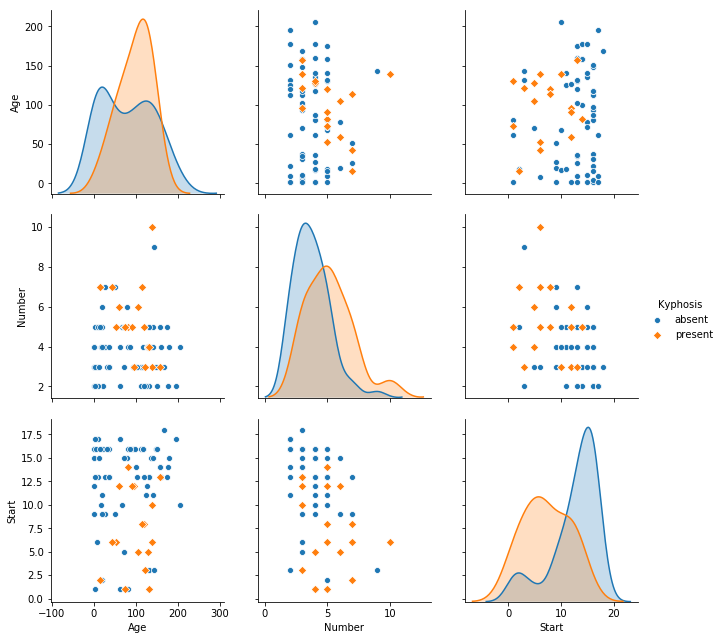

In [9]:
sns.pairplot(df,hue = 'Kyphosis',size = 3,markers=["o", "D"])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop(['Kyphosis'],axis = 1)

In [12]:
y = df['Kyphosis']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
dtree = DecisionTreeClassifier()

In [16]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [17]:
predictions = dtree.predict(X_test)

In [18]:
from sklearn.metrics import classification_report,confusion_matrix

In [19]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[16  2]
 [ 3  4]]


              precision    recall  f1-score   support

      absent       0.84      0.89      0.86        18
     present       0.67      0.57      0.62         7

   micro avg       0.80      0.80      0.80        25
   macro avg       0.75      0.73      0.74        25
weighted avg       0.79      0.80      0.80        25



In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rfc = RandomForestClassifier(n_estimators = 100)

In [22]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [23]:
rfc_pred = rfc.predict(X_test)

In [24]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[16  2]
 [ 5  2]]


              precision    recall  f1-score   support

      absent       0.76      0.89      0.82        18
     present       0.50      0.29      0.36         7

   micro avg       0.72      0.72      0.72        25
   macro avg       0.63      0.59      0.59        25
weighted avg       0.69      0.72      0.69        25

